In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import matplotlib.pyplot as plt
np.random.seed(1671) # for reproducibility

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
NB_CLASSES = 10
#X_train = X_train.reshape(X_train.shape[0],-1)
print(X_train.shape)
#X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

NB_FEATURES = X_train.shape[1]
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, NB_CLASSES)
Y_test = utils.to_categorical(y_test, NB_CLASSES)

(60000, 28, 28)
(10000, 28, 28)


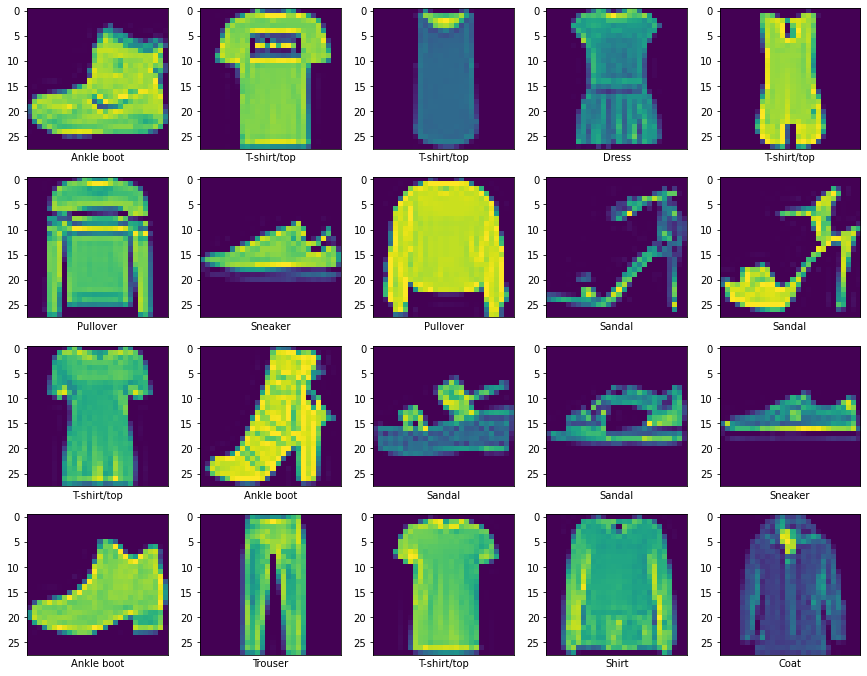

In [ ]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize = (15, 15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xlabel(labels[y_train[i]])
    plt.imshow(X_train[i].reshape(28, 28))

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
DROPOUT = 0.3
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,Activation('relu')))
model.add(Dropout(0.5))
model.add(Dense(64,Activation('relu')))

model.add(Dropout(0.5))
model.add(Dense(10,Activation('softmax')))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
938/938 [==============================] - 12s 5ms/step - loss: 1.2059 - accuracy: 0.5609 - val_loss: 0.4862 - val_accuracy: 0.7989
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5516 - accuracy: 0.7966 - val_loss: 0.3829 - val_accuracy: 0.8602
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 0.4466 - accuracy: 0.8413 - val_loss: 0.3308 - val_accuracy: 0.8848
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 0.4019 - accuracy: 0.8622 - val_loss: 0.3086 - val_accuracy: 0.8897
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3620 - accuracy: 0.8741 - val_loss: 0.2908 - val_accuracy: 0.8979
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3370 - accuracy: 0.8853 - val_loss: 0.2746 - val_accuracy: 0.9040
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3225 - accuracy: 0.8893 - val_loss: 0.2616 - val_accuracy: 0.9077
Epoch

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2410 - accuracy: 0.9261
Test score: 0.24098718166351318
Test accuracy: 0.9261000156402588


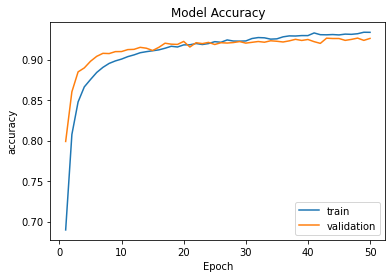

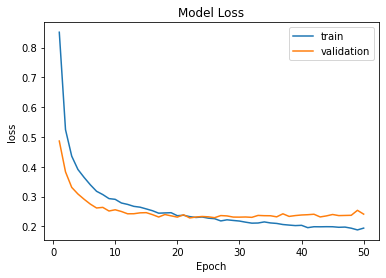

In [ ]:
plt.title('Model Accuracy')
plt.plot( range(1, 51),history.history['accuracy'])
plt.plot( range(1, 51),history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1, 51),history.history['loss'])
plt.plot(range(1, 51),history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()